In [258]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import os
import glob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
pd.options.display.max_colwidth = 10000
#2020-11-02-01

[nltk_data] Downloading package vader_lexicon to C:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [352]:
path = 'hydrated_tweets/2020-11'
all_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f, sep=';') for f in all_files), ignore_index=True)
df = df.dropna(subset=['location'], how='all')
df['text'] = df['text'].str.lower()

<ipython-input-352-82583a72a102>:3: DtypeWarning: Columns (0,5,6,7,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f, sep=';') for f in all_files), ignore_index=True)


In [353]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
stateMapping = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NY': 'New York', 'NM': 'New Mexico', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT':  'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV':  'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [354]:
df_terms = pd.read_csv('search_terms.csv', sep=';')
df_terms['term'] = df_terms ['term'].str.lower()
df_terms[(df_terms['party'].str.contains('N'))]

,term,party
54,ballot,N
55,mailin,N
56,mail-in,N
57,mail in,N
89,presidential debate,N
90,#debates,N
91,presidentialdebate,N
92,electoral vote,N
93,debates2020,N
94,elections2020,N


In [355]:
# Check terms
df_trump = df[(df['text'].str.contains('trump')) | (df['text'].str.contains('maga')) | (df['text'].str.contains('fraud'))]
df_biden = df[(df['text'].str.contains('biden')) | (df['text'].str.contains('kamala'))| (df['text'].str.contains('harris'))]

In [356]:
# Check state locations
states_dict_trump = {}
for state in stateCodes:
    states_dict_trump[stateMapping[state]] = df_trump[df_trump['location'].str.contains(state+ '|' + stateMapping[state])]
    
    
states_dict_biden = {}
for state in stateCodes:
    states_dict_biden[stateMapping[state]] = df_biden[df_biden['location'].str.contains(state+ '|' + stateMapping[state])]

In [357]:
count = 0
for state in states:
    count+= len(states_dict_biden[state])
count

259408

In [358]:
count = 0
for state in states:
    count+= len(states_dict_trump[state])
count

488479

In [359]:
len(df)

1618341

In [360]:
def sentimentVerdict(sentiment):
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"
    
for state in states:
    states_dict_biden[state]['sentiment_scores'] = states_dict_biden[state]['text'].apply(lambda x: sid.polarity_scores(x))
    states_dict_biden[state]['sentiment'] = states_dict_biden[state]['sentiment_scores'].apply(lambda x: sentimentVerdict(x))
    states_dict_trump[state]['sentiment_scores'] = states_dict_trump[state]['text'].apply(lambda x: sid.polarity_scores(x))
    states_dict_trump[state]['sentiment'] = states_dict_trump[state]['sentiment_scores'].apply(lambda x: sentimentVerdict(x)) 

<ipython-input-360-25aa2a8aa70d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_dict_biden[state]['sentiment_scores'] = states_dict_biden[state]['text'].apply(lambda x: sid.polarity_scores(x))
<ipython-input-360-25aa2a8aa70d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_dict_biden[state]['sentiment'] = states_dict_biden[state]['sentiment_scores'].apply(lambda x: sentimentVerdict(x))
<ipython-input-360-25aa2a8aa70d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [361]:
# Election data
df_elec = pd.read_csv('election_data.csv', sep=',')
df_elec = df_elec[['state', 'candidate', 'total_votes', 'won']]
df_elec = df_elec[((df_elec.candidate == 'Joe Biden') | (df_elec.candidate == 'Donald Trump')) & (df_elec.state != 'District of Columbia')]
df_elec = df_elec.groupby(['state', 'candidate'])['total_votes'].apply(sum).reset_index()

In [362]:
percentagelist = []
for state in states:
    bidentot = df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Joe Biden')]['total_votes']
    trumptot = df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Donald Trump')]['total_votes']
    bidenpercentage = int(bidentot) / (int(bidentot) + int(trumptot))
    trumppercentage = int(trumptot) / (int(bidentot) + int(trumptot))
    percentagelist.append(trumppercentage)
    percentagelist.append(bidenpercentage)
    
df_elec['ratio of votes'] = percentagelist

In [363]:
# Percentage sentiment per state
state_sentiment_trump = {}
state_sentiment_biden = {}
for state in states:
    # Trump
    d_t = dict(states_dict_trump[state]['sentiment'].value_counts())
    tot = d_t['Positive']+d_t['Negative']#+d_t['Neutral']
    post= d_t['Positive'] / tot
    negt= d_t['Negative'] / tot
    # Biden
    d_b = dict(states_dict_biden[state]['sentiment'].value_counts())
    tot = d_b['Positive']+d_b['Negative']#+d_b['Neutral']
    posb= d_b['Positive'] / tot
    negb= d_b['Negative'] / tot
       
    state_sentiment_trump[state] = {'positive' : post, 'negative': negt}
    state_sentiment_biden[state] = {'positive' : posb, 'negative': negb}


In [364]:
# put sentiments and election outcomes in list for plotting
positive_sentiments_states_trump = []
elec_result_states_trump = []
positive_sentiments_states_biden = []
elec_result_states_biden = []
for state in states:
    positive_sentiments_states_trump.append(state_sentiment_trump[state]['positive'])
    elec_result_states_trump.append(list(df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Donald Trump')]['ratio of votes'])[0])
    positive_sentiments_states_biden.append(state_sentiment_biden[state]['positive'])
    elec_result_states_biden.append(list(df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Joe Biden')]['ratio of votes'])[0])

In [365]:
negative_sentiments_states_trump = []
elec_result_states_trump = []
negative_sentiments_states_biden = []
elec_result_states_biden = []
for state in states:
    negative_sentiments_states_trump.append(state_sentiment_trump[state]['negative'])
    elec_result_states_trump.append(list(df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Donald Trump')]['ratio of votes'])[0])
    negative_sentiments_states_biden.append(state_sentiment_biden[state]['negative'])
    elec_result_states_biden.append(list(df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Joe Biden')]['ratio of votes'])[0])

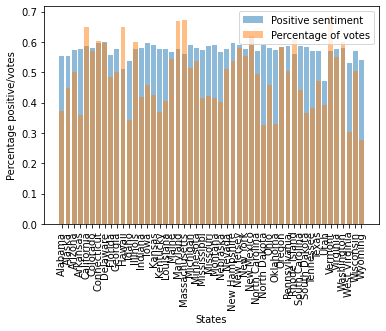

In [368]:
plt.bar(states, positive_sentiments_states_biden, alpha = 0.5, label="Positive sentiment")
plt.bar(states, elec_result_states_biden, alpha = 0.5, label = 'Percentage of votes')
plt.xticks(rotation=90)
plt.ylabel("Percentage positive/votes")
plt.xlabel("States")
plt.legend()
plt.show()

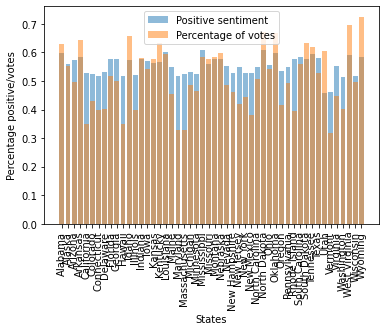

In [367]:
plt.bar(states, positive_sentiments_states_trump, alpha = 0.5, label="Positive sentiment")
plt.bar(states, elec_result_states_trump, alpha = 0.5, label = 'Percentage of votes')
plt.xticks(rotation=90)
plt.ylabel("Percentage positive/votes")
plt.xlabel("States")
plt.legend()
plt.show()